# 1. RNN(Recurrent Neural Network): 순환신경망
- 순서가 중요

## 순차데이터가 들어감
- 텍스트 데이터: ex) i am a boy
- 시계열 데이터: ex) 1일 15'C, 2일 17'C, 3일 16'C

## 기존 신경망은 FFNN구조
- FFNN: feedfoward neural network-> 앞으로만 전달

# 순환신경망: 이전 샘플을 기억
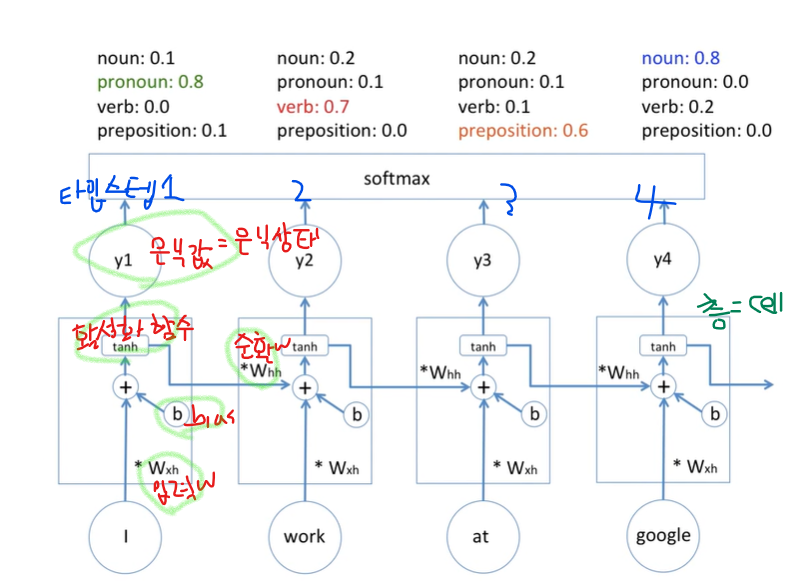
- 하나의 샘플은 여러 단어로 이루어진 텍스트나 시계열 데이터->원핫인코딩이나 단어임베딩으로 벡터화 후 입력층에 넣음  
1. 처음에는 입력벡터에 입력가중치+bias후 활성화 함수 tanh로 은닉값(은닉상태)출력: 이 과정이 하나의 타임스텝
2. 이 타임스텝은 단어개수(시퀀스길이)만큼 반복
3. 두번째부터는 바로 전 은닉값*순환가중치가 추가로 더해짐
4. 모든 과정이 끝나면 모든 은닉값이 출력되는데 이는 return_sequences=True이기 때문
- 네모난 칸은 순환신경망층으로 셀이라고도 부름
- 같은 샘플끼리 안에서 순환가중치에 의해 서로 영향받지만 서로 다른 샘플끼리는 영향을 주지 않음
### 이때 동일한 하나의 뉴런에서 모든 샘플의 모든 단어에 적용되는 입력가중치와 순환가중치는 동일함!!!
- 주로 여러개의 샘플을 한번에 넣고 손실값을 구해 가중치를 업데이트 

# return_sequences=False일때: 대부분 이 조건
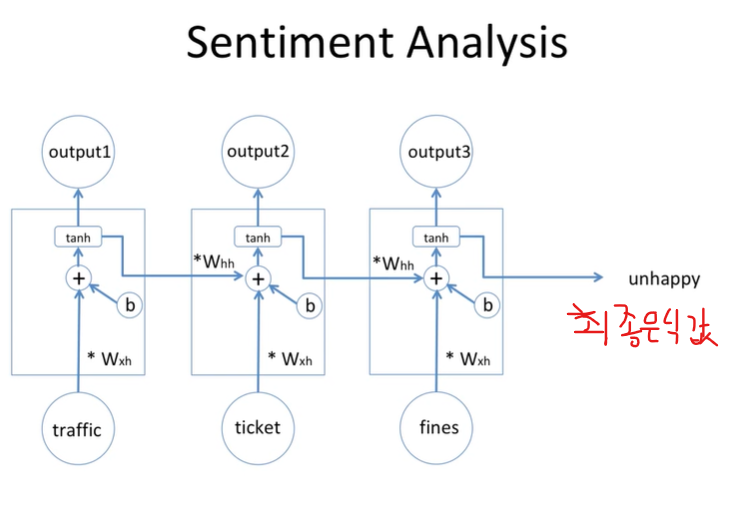  
- 마지막 은닉값만 출력되고 나머지는 순환가중치에만 쓰이고 버려짐
### True면 은닉값 개수는 샘플당 단어개수만큼 벡터로
### False면 샘플당 스칼라값 하나

# 활성화 함수: tanh
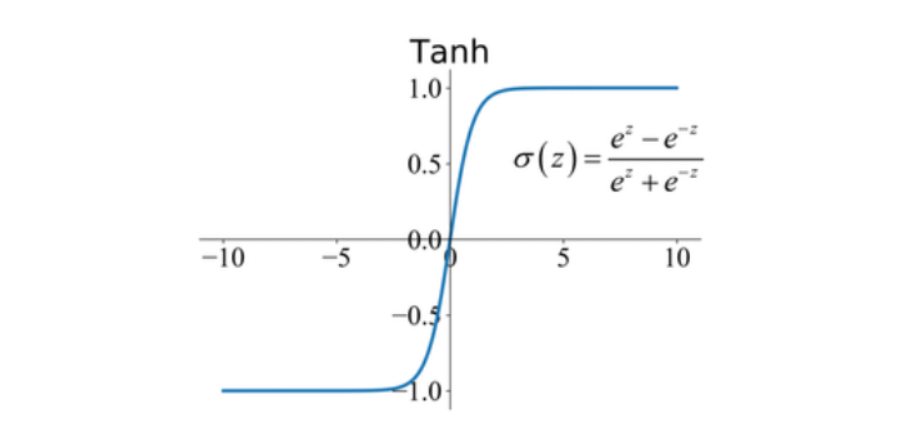
- 출력된 값을 -1~1사이의 값으로 바꿔 은닉값으로 출력
- 타임스텝마다 매번 활성화 함수 적용

# 입력차원=입력특성개수=모든 단어를 동일한 차원의 벡터로
### !!!정수인코딩 후 패딩하는 이유: 단어를 동일한 차원으로 만들기 위해!!!
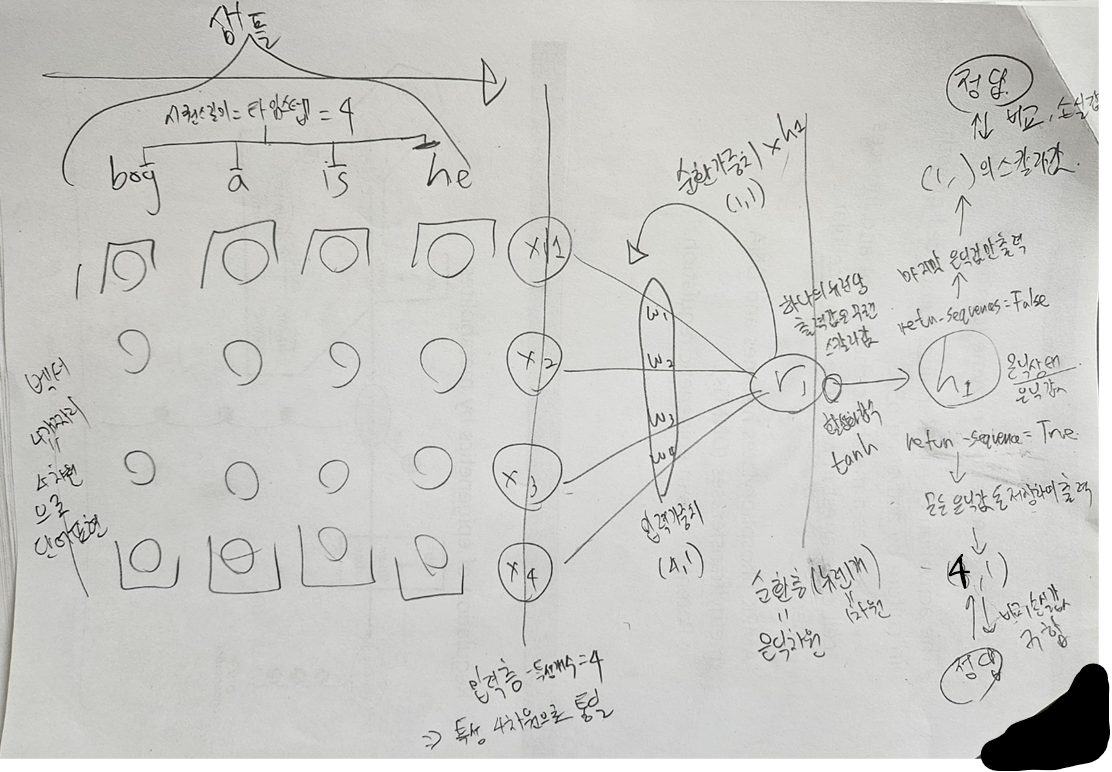
- 하나의 단어4개(시퀀스길이4)짜리 샘플 1개를 뉴런 1개짜리에 넣었을때의 예시
- 모든 샘플의 모든 단어는 모두 동일한 차원으로 벡터화해야함!!!!
1. 각 단어를 벡터4개짜리 4차원벡터(특성개수4=특성차원)로 단어표현해서 입력층으로 넣음
2. 입력가중치는 입력층의 특성차원과 같은 4개=(4,1), bias는 뉴런개수인 1개, 순환가중치는 (뉴런개수,뉴런개수)=(1,1)
3. 타임스텝을 반복할때마다 활성화함수 거치며 출력값은 무조건 하나의 스칼라값
4. 타임스텝 종료하면 return_sequence=False시 마지막 은닉값만 출력-> (1,)의 스칼라값 은닉층->정답과 비교하여 손실함수
5. return_sequence=True면 모든 은닉값 출력-> (4,1) ->정답과 비교하여 손실함수

# 은닉차원이 다차원일떄 = 뉴런이 여러개일때
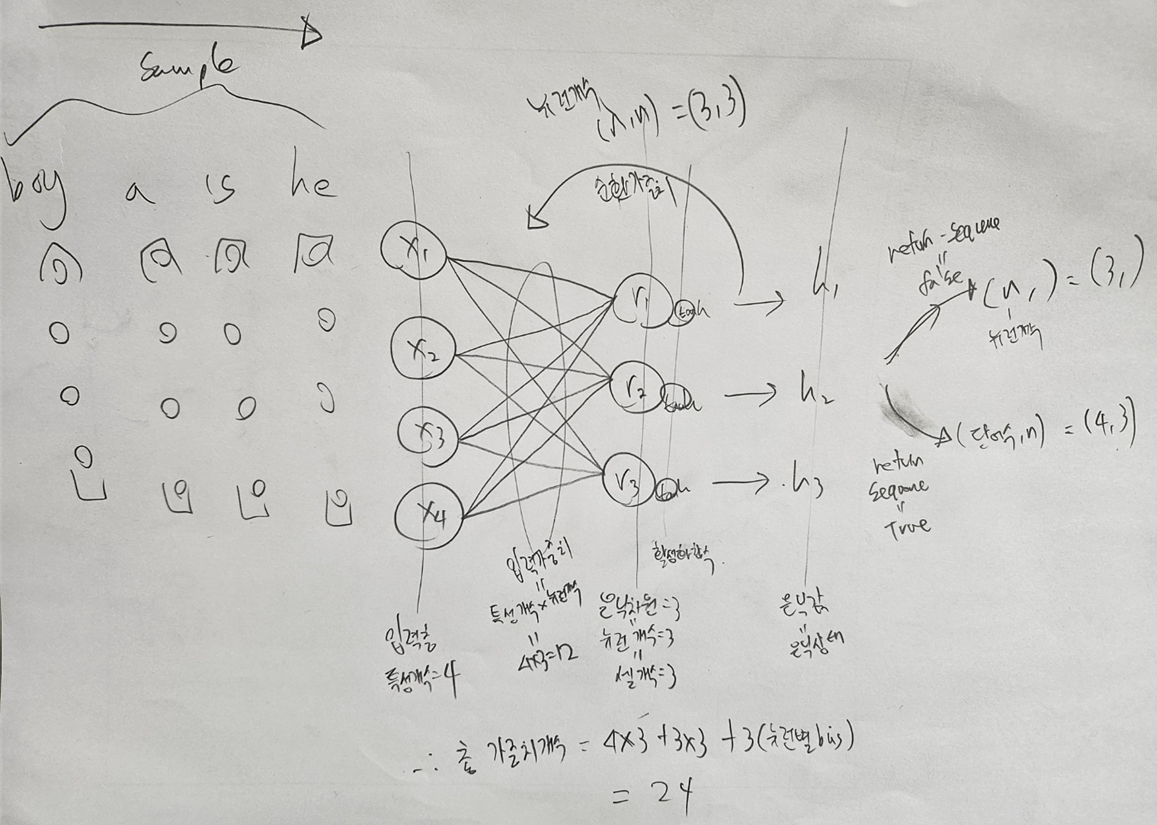
- 입력차원 특성 4개로해서 은닉차원=뉴런개수=3차원일때의 예시
1. 입력층에 벡터4개짜리로 전환해 단어들 순차적으로 넣음
2. 각 뉴런은 특성4개에 따라 입력가중치도 4개인데 뉴런이 3개이므로 총 입력가중치는 4*3=12개
3. bias는 뉴런개수인 3개
4. ### 순환가중치 크기는 (뉴런개수,뉴런개수)인 (3,3)이며 하나의 뉴런의 하나의 순환가중치는 본인뿐만 아니라 나머지 다른 모든 뉴런에도 적용: 따라서 3*3=9개 vs 이때 입력가중치는 다른 뉴런에 영향 X !!!
5. 따라서 각 뉴런 은닉값:h1,h2,h3이고 뉴런별 순환가중치를 w1,w2,w3이라하면 하나의 뉴런출력값=입력X입력가중치+bias+h1Xw1+h2Xw2+h3Xw3
6. 타임스텝종료 후 return_sequence=False이면 은닉값 크기는 (뉴런개수,)=(3,)
7. return_sequence=True이면 은닉값 크기는 (단어수,뉴런개수)= (4,3)
- 총 가중치 개수는 3X4+3X3+3=24
### RNN은 다른 신경망과 달리 뉴런이 다른 뉴런에 영향줌: 순환가중치의 (n,n)형태가 곱해지면서 다같이 곱해지므로

# 3차원 관점으로 보기
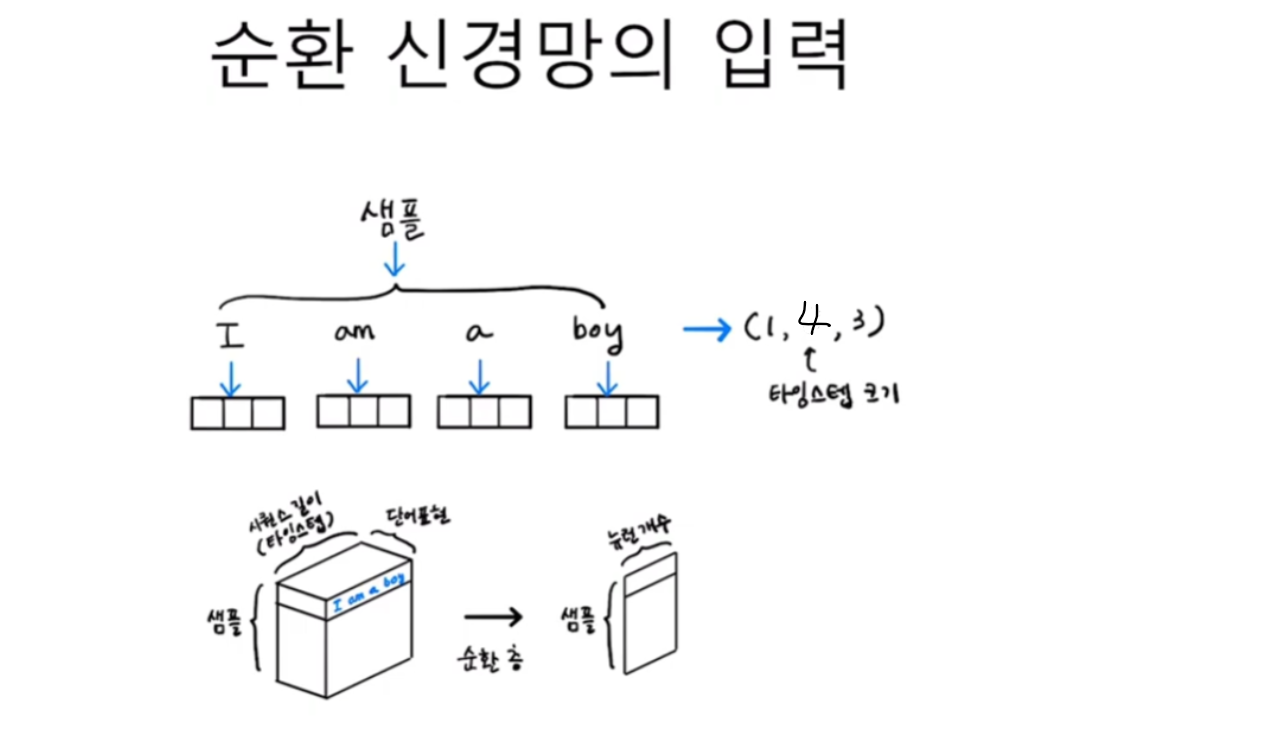
- 샘플을 시퀀스라 부르며 시퀀스안에는 여러 데이터있음==데이터개수=시퀀스길이=타임스텝
- 하나의 샘플크기=(1,시퀀스길이,단어표현=특성개수)-> 샘플n개면 크기=(n,시퀀스길이,단어표현=특성개수)
- 하나의 샘플이 순환층을 지나갈때 뉴런이 하나면 스칼라값, 뉴런 여러개면 벡터값(이 책에서는return_sequence=False)
- return_sequence=False일때 여러 샘플 순환층 지나면 출력크기는 (샘플 수, 뉴런 수)
- return_sequence=True일때 여러 샘플 순환층 지나면 출력크기는 (샘플 수, 시퀀스 길이, 뉴런 수)

# 다층 순환 신경망일떄(순환층 여러개일때)
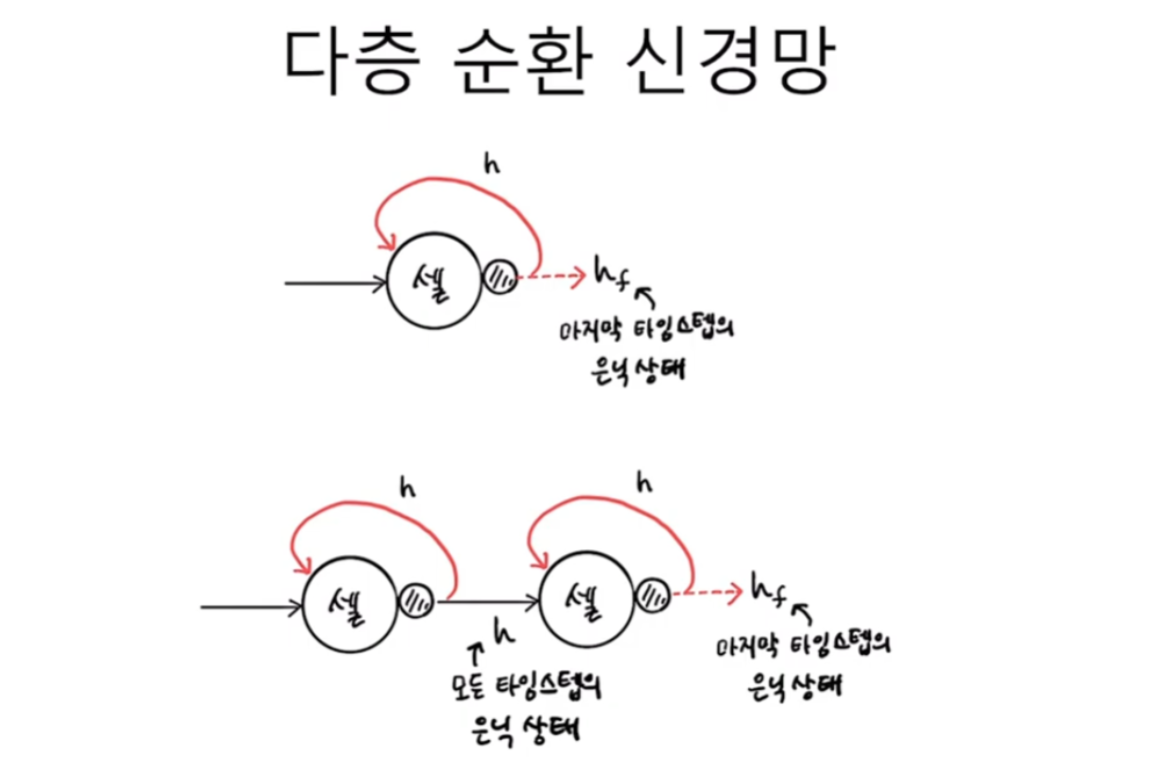
- 첫번째 출력을 return_sequence=True로 하여 모든 은닉값 전달

# 순환층을 밀집층과 연결
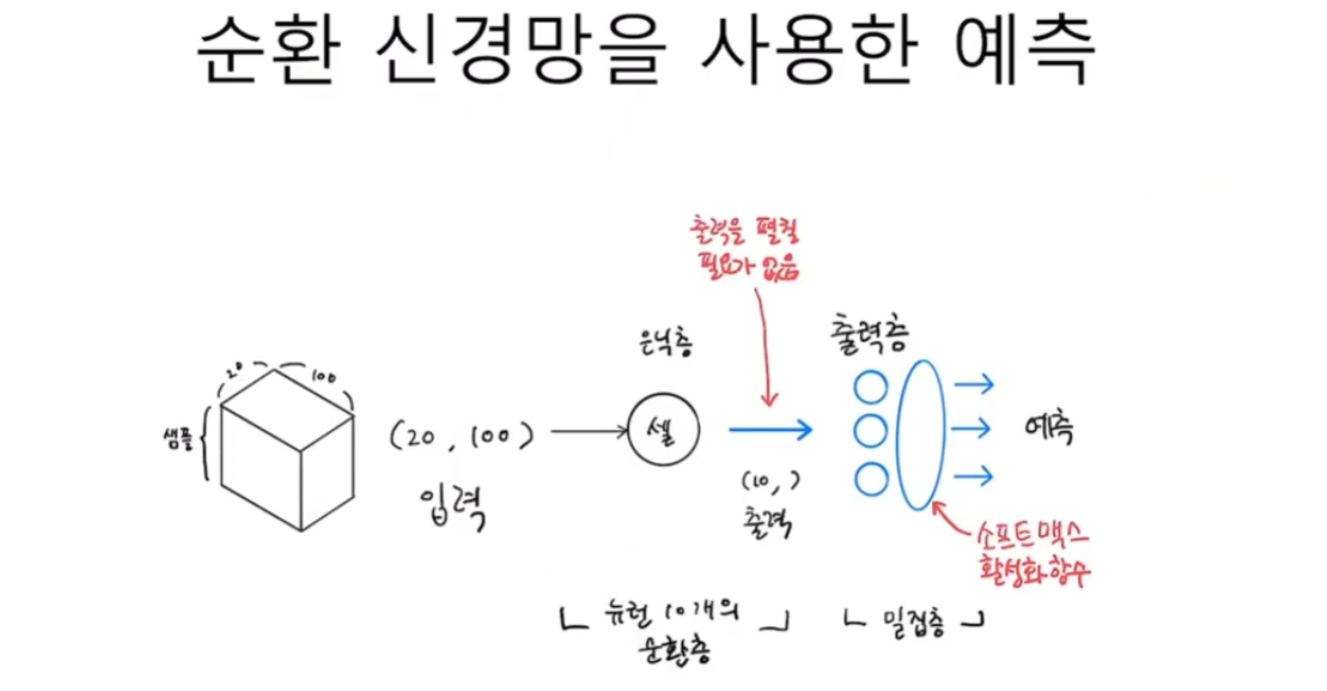
- 하나의 샘플은 (뉴런개수,)의 출력값 크기를 가지므로 밀집층 들어갈때 1차원화할 필요가 없음
- 따라서 flatten층 필요X

# 2. IMDB 영화 리뷰 테이터 셋 사용: 이미 정수 인코딩 되어있음
### !!!텐서플로우의 Tokenizer를 사용하였기에 높은 빈도수의 단어는 낮은수(3부터) 할당!!!
- 단어 토큰이 하나의 타임스텝
- 인코딩 시 0:패딩, 1:문장의 시작, 2:훈련세트에서 만든 어휘사전에 없는 토큰

## 1-데이터 불러오기

### 자주 등장하는 단어 300개까지만

In [37]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=300)  #자주 등장하는 단어 300개까지만  

In [38]:
x_train.shape, x_test.shape #train, test각각 샘플 25000개 1차원으로

((25000,), (25000,))

In [39]:
len(x_train[0]), len(x_train[1]) # 하나의 1차원 데이터에는 218, 189개의 토큰개수존재

(218, 189)

### 300개 단어에 들어있지 않은 토큰은 모두 2로 표시

In [40]:
print(x_train[0]) #예시

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


### 정답값: 0=부정, 1=긍정

In [5]:
y_train[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

## 2-train에서 validation세트 떼어놓기

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

## 3- 패딩
### 패딩위한 샘플별 단어길이 보기

239.00925 178.0


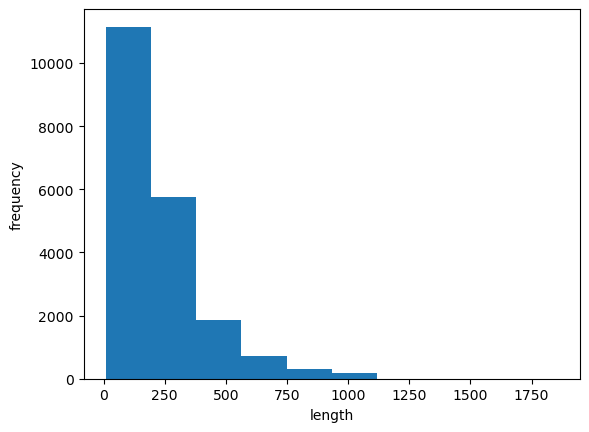

In [7]:
import numpy as np

lengths = np.array([len(x) for x in x_train])
print(np.mean(lengths), np.median(lengths))  #239, 178

import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

### 대부분 리뷰길이는 300미만->우리는 100개 단어까지만 사용

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=100) #100개 길이까지만 보기
x_train.shape

(20000, 100)

### 이때 truncating의 디폴트는 pre여서 앞부분 자르고 뒤부분만 가져옴
### 또한 padding의 디폴트도 pre여서 자리가 남으면 앞쪽에 0으로 패딩
- 뒷부분의 정보가 더 유용하리라 기대하기 때문

In [9]:
x_train[0]  #시작을 알리는 1값이 처음에 없음->앞부분이 잘렸다

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158])

In [10]:
x_train[5]  # 짧은 데이터인 [5]는 앞부분이 패딩되어 0으로 채워짐

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94, 205,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2])

## validation에도 패딩

In [11]:
x_val = pad_sequences(x_val, maxlen=100)

---
---
---
---
---
# (4-원핫인코딩하기)-> 뒤에 단어임베딩 방법이 따로 존재
- 단어빈도수가 낮은 값에는 높은 수가 할당되는데 이는 신경망에 들어가면 큰 활성화 출력을 만들게 됨
- 근데 300값의 단어를 3값의 단어보다 더 중요시해야 할 이유가 없음
-  ->원핫인코딩으로 모든 값을 1로 변환 필요
-  이때 총 단어수가 300이므로 각 단어를 300차원의 벡터로: 하나가 1이고 나머지 299자리는 0으로

### tensorflow.keras.utils.to_categorical사용

In [12]:
from tensorflow import keras
ohex_train = keras.utils.to_categorical(x_train)
ohex_train.shape #20000개의 샘플, 하나의 샘플에는 뒷쪽의 100개 단어까지만, 각 단어는 (300,)의 원핫인코딩 벡터

(20000, 100, 300)

In [13]:
ohex_train[0][0][:12], np.sum(ohex_train[0][0]) #11번쨰 원소가 1, 총합또한 1로 나머지는 0

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 1.0)

In [14]:
# valdidation도 원핫인코딩
ohex_val = keras.utils.to_categorical(x_val)

# 5-순환신경망 만들기
- 순환층=SimpleRNN, 활성화 함수 디폴트는 tanh
### return_sequence의 디폴트 값은 False로 출력 은닉값은 1개 !!!!!
- 이진분류이므로 마지막 밀집층은 뉴런1개, 활성화함수는 시그모이드로 확률 출력

In [15]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300))) #뉴런 8개로, 샘플 하나당 들어오는 크기는 (100,300), 활성화함수 디폴트는 tanh
model.add(keras.layers.Dense(1, activation='sigmoid'))  #뉴런 1개, 시그모이드 함수로 활성화

C:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

### RNN의 가중치 개수=(입력가중치:300X8)+(순환가중치:8X8)+(bias:8)=2472
### 밀집층(출력층)의 가중치 개수= 입력된 8개의 은닉값 각각의 가중치+bias=9

# 6-순환신경망 훈련하기

In [17]:
# 환경설정
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)  #디폴트 0.001대신 0.0001로
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, #조기종료시킴
                                                  restore_best_weights=True)

#학습
history = model.fit(ohex_train, y_train, epochs=100, batch_size=64,  #에포크 100회, 한번에 학습할 샘플은 64개
                    validation_data=(ohex_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])  

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4981 - loss: 0.7007 - val_accuracy: 0.5044 - val_loss: 0.6970
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5044 - loss: 0.6970 - val_accuracy: 0.5120 - val_loss: 0.6954
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5089 - loss: 0.6947 - val_accuracy: 0.5144 - val_loss: 0.6942
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5160 - loss: 0.6929 - val_accuracy: 0.5196 - val_loss: 0.6931
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5171 - loss: 0.6926 - val_accuracy: 0.5206 - val_loss: 0.6922
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5298 - loss: 0.6899 - val_accuracy: 0.5244 - val_loss: 0.6913
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5331 - loss: 0.6894 - val_accuracy: 0.5284 - val_loss: 0.6905
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5362 - loss: 0.6885 -

# 7-평가

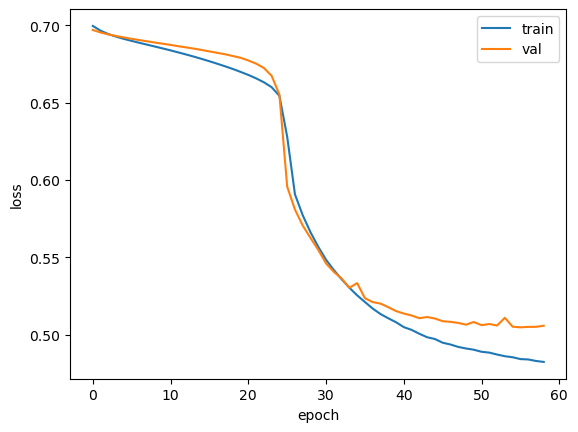

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 꾼준히 감소하다 변화없으면 종료
---
---
---
---
---

# 4-단어임베딩(word embedding): 주로 word2vec방식 사용
### 토큰 한개를 원핫인코딩으로 300차원으로 늘렸으므로 손해가 300배
- 순화신경망에서 텍스트 처리할때 즐겨사용하는 방법
- 각 단어를 고정된 크기의 실수벡터로 바꿔줌 ex) cat=[0.2 , 0.1 , 1.3 , 0.8 , 0.2 , 0.4 , 1.1 , 0.9 , 0.2 , 0.1]
- 원핫인코딩보다 차원이 더 작고 훨씬 의미있는 값으로 채워짐
### 단어들 간의 의미적 관계를 벡터 공간 내에서 표현-> 단어의 의미가 벡터의 차원들 간의 관계로 표현!!!

# @결국 텍스트->Tokenizer->padding->keras의 embedding층->RNN층->Dense층!
## -> 그냥 padding된 x_train, x_val세트를 넣으면 됨

# 5-임베딩 층 포함된 순환 신경망 만들기
- keras.layers.Embedding

In [19]:
model2 = keras.Sequential()

# 모든 단어를 16개의 벡터로 벡터화 시키는 단어임베딩층 넣기
model2.add(keras.layers.Embedding(300, 16, input_shape=(100,))) #어휘사전크기=300, 임베딩 벡터크기=16, 입력시퀀스길이=100
model2.add(keras.layers.SimpleRNN(8))  #여기서는 input_shape필요 X
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

C:\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 5,009 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

### embedding층 가중치 개수= 300개의 각 토큰이 16벡터로-> 300X16=4800개
### RNN 가중치 개수=(입력가중치개수: 입력특성개수16 X 뉴런개수8)+(순환가중치: 뉴런개수8X뉴런개수8)+(bias 8)=200
### 밀집층 가중치는 동일하게 8+1=9
- RNN가중치 개수가 많이 줄었지만 단어임베딩이 특성을 잘 표현해줄것임

# 6-순환신경망 훈련하기

In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) #디폴트 0.001대신 0.0001로
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',  #손실함수-이진분류
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', #저장될 모델 이름
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,   #조기종료
                                                  restore_best_weights=True)

history = model2.fit(x_train, y_train, epochs=100, batch_size=64,   #횟수 100, 한번에 학습할 샘플개수=64
                     validation_data=(x_val, y_val),            #그냥 패딩된 값까지만 넣으면 됨
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5109 - loss: 0.6972 - val_accuracy: 0.6134 - val_loss: 0.6698
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6337 - loss: 0.6609 - val_accuracy: 0.6646 - val_loss: 0.6420
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6760 - loss: 0.6330 - val_accuracy: 0.6606 - val_loss: 0.6312
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6989 - loss: 0.6103 - val_accuracy: 0.7088 - val_loss: 0.5922
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7179 - loss: 0.5872 - val_accuracy: 0.7182 - val_loss: 0.5782
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7361 - loss: 0.5650 - val_accuracy: 0.7266 - val_loss: 0.5600
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7428 - loss: 0.5485 - val_accuracy: 0.7326 - val_loss: 0.5482
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7434 - loss: 0.5391 - v

# 7-평가
- 가중치도 줄고 훈련세트 차원도 많이 줄었지만 원핫인코딩과 비슷한 성는

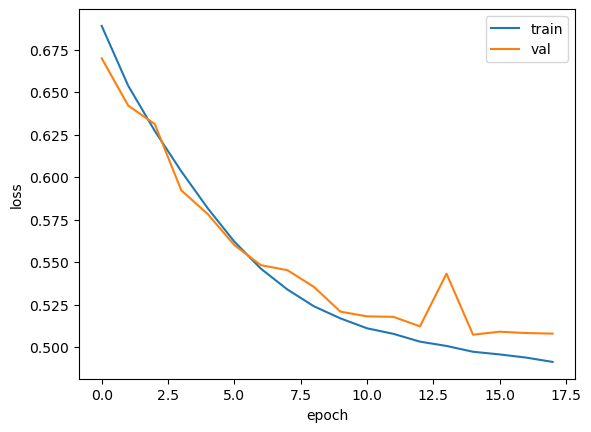

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 3. LSTM과 GRU
- simpleRNN은 타임스텝이 반복될수록 초기의 데이터들이 점점 소실됨
- 이를 해결하기 위한 장기기억 RNN 

# ------------LSTM(Long Short-Term Memory)---------------
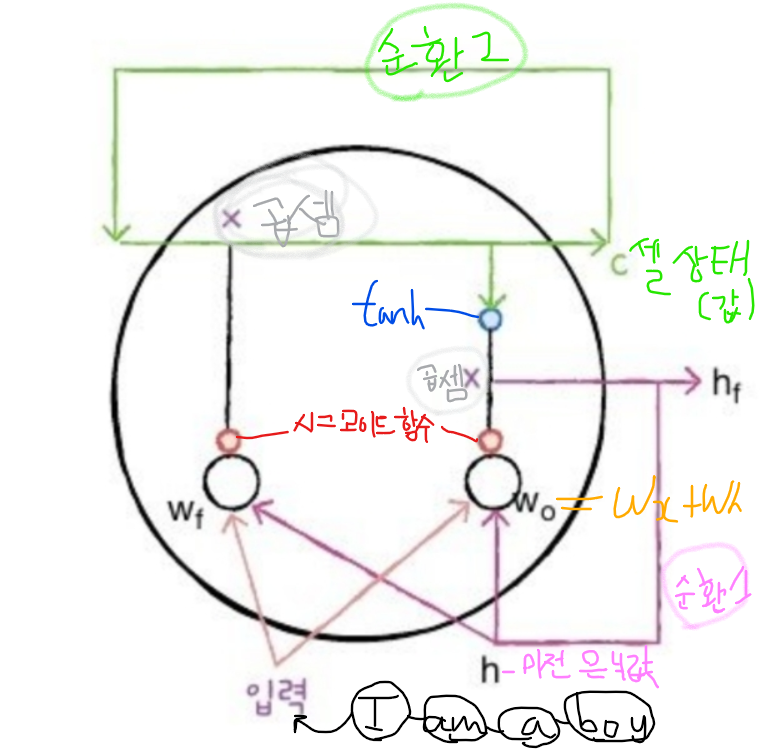
1. 처음에는 첫번째 토큰이 입력되어 입력가중치가 곱해지고 시그모이드를 지난다음 초록부분의 C의 셀상태(C0=0)와 곱해져 은닉값h 출력
2. Wo는 입력가중치+순환가중치임-> 두번째 토큰과 이전 은닉값이 들어와 Wo와 시그모이드를 거친다음 tanh를 지난 C와 곱해져 두번째 은닉값 출력
3. 이때 두번때 C는 첫번째C X (두번째 입력값과 이전 은닉값에 Wf가중치) 곱해진 값
- 이때 Wf와 Wo는 다름

## C만들어지는 과정에 추가적인 과정 필요
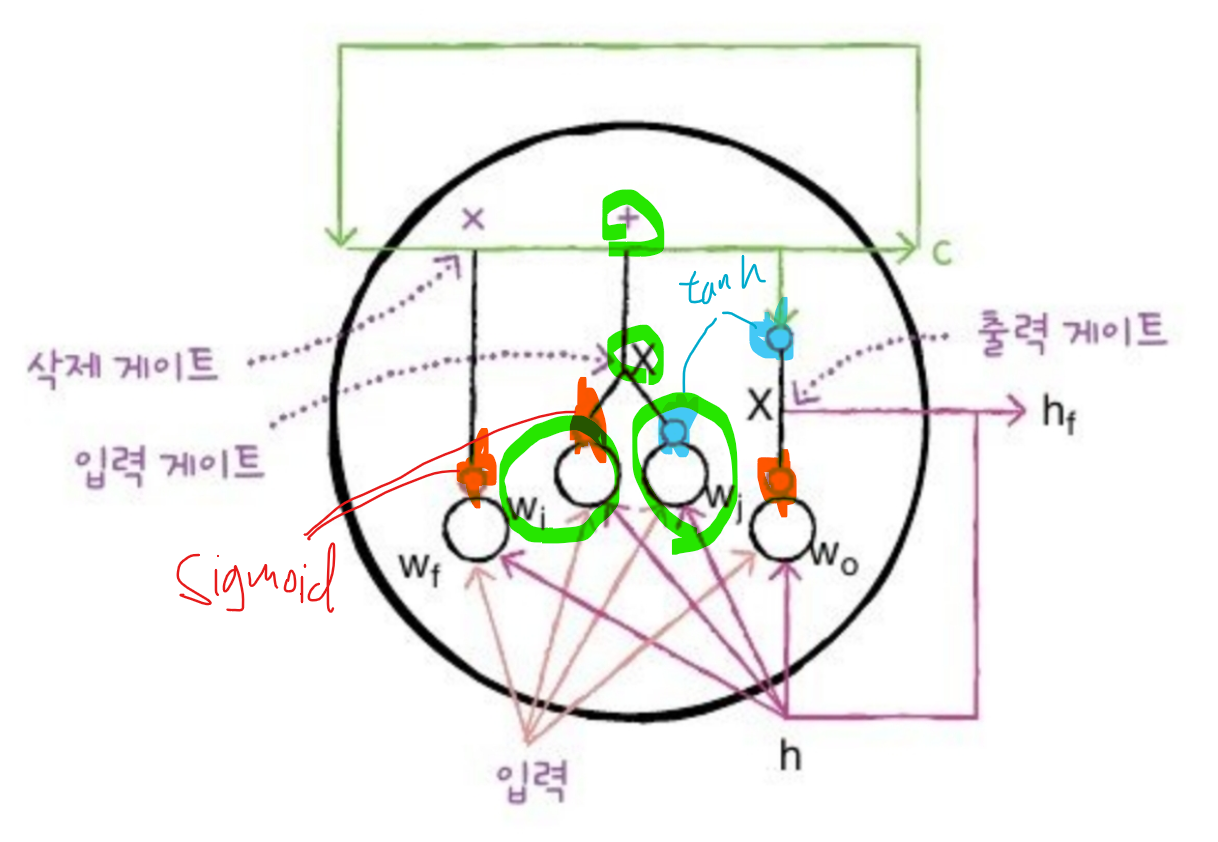
- 곱해진 두번째C값에 더해져야할 값이 있음
- 입력과 은닉값에 각기 다른 가중치가 곱해지고 하나는 시그모이드, 다른 하나는 tanh지나고 서로 곱해짐
- 이 값은 지나오던 위의 C값에 더해짐
- 결국 이 최종 C값은 tanh지나 입력+은닉값에 곱해져 두번째 은닉값 출력
### LSTM에는 총 4개의 셀(층) 존재
- 삭제게이트는 셀 상태에 있는 정보룰 제거, 입력게이트는 새로운 정보를 셀에 추가->출력게이트를 통해 은닉값에 영향

## 1-데이터 준비

In [22]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=500)    #이번엔 500개 단어사용

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

## 2-패딩: 최대 100개로

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=100)
x_val = pad_sequences(x_val, maxlen=100)

## 3-1순환신경망 만들기
- simpleRNN대신 LSTM층
## 3-2 순환층에 드롭아웃도 적용시키기
- simpleRNN나 LSTM층에 파라미터로 넣으면 됨-> 은닉층에 있는 **뉴런의 출력**을 랜덤하게 끔
- dropout(셀 입력에 적용) or recurrent_dropout(순환되는 은닉상태에 적용)옵션
- 이때 recurrent_dropout은 GPU안써 속도 매우 느려짐-> 여기서는 dropout만

In [25]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model.add(keras.layers.LSTM(8, dropout=0.3))   # 30%를 규제
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

### LSTM에는 각 뉴런당 셀이 4개있으므로 200X4=800

## 4-환경설정 및 학습

In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5099 - loss: 0.6930 - val_accuracy: 0.5272 - val_loss: 0.6924
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5589 - loss: 0.6918 - val_accuracy: 0.5816 - val_loss: 0.6906
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5947 - loss: 0.6896 - val_accuracy: 0.6146 - val_loss: 0.6868
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6237 - loss: 0.6838 - val_accuracy: 0.6716 - val_loss: 0.6747
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6609 - loss: 0.6655 - val_accuracy: 0.7054 - val_loss: 0.6194
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7111 - loss: 0.6059 - val_accuracy: 0.7242 - val_loss: 0.5845
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7343 - loss: 0.5748 - val_accuracy: 0.7428 - val_loss: 0.5599
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7436 - loss: 0.5544 - 

## 5-검증

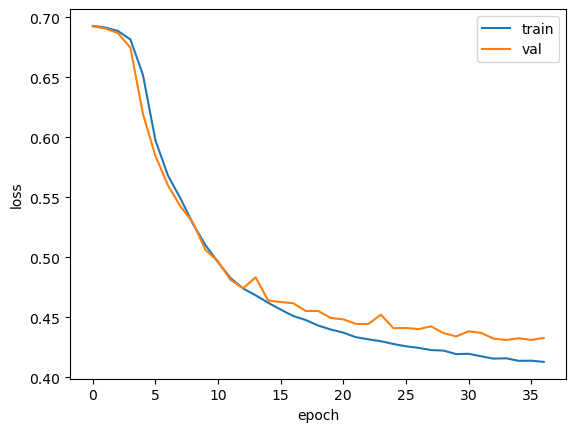

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# ---------------2개 층 연결-------------------
- 모든 은닉층이 출력돼야함-> return_sequences=True옵션 필요

In [28]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))   #여기에 return_sequences=True
model3.add(keras.layers.LSTM(8, dropout=0.3))   #여기는 필요X
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(x_train, y_train, epochs=100, batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5279 - loss: 0.6926 - val_accuracy: 0.5988 - val_loss: 0.6912
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5709 - loss: 0.6902 - val_accuracy: 0.6176 - val_loss: 0.6846
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6150 - loss: 0.6776 - val_accuracy: 0.6804 - val_loss: 0.6368
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6786 - loss: 0.6211 - val_accuracy: 0.7158 - val_loss: 0.5660
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7129 - loss: 0.5675 - val_accuracy: 0.7264 - val_loss: 0.5516
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7391 - loss: 0.5366 - val_accuracy: 0.7572 - val_loss: 0.5105
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7552 - loss: 0.5151 - val_accuracy: 0.7696 - val_loss: 0.4923
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7693 - loss: 0

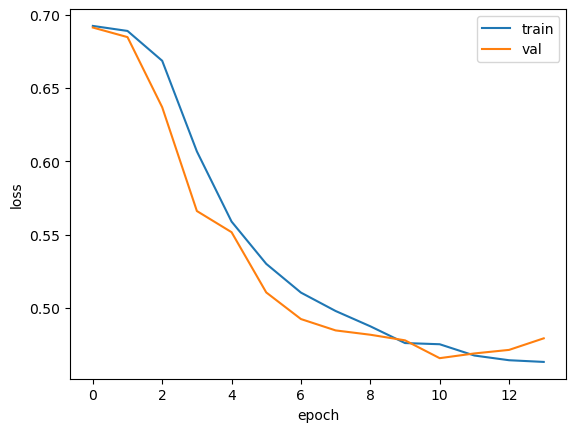

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 일반적으로 순환층을 여러개 쌓으면 성능 높아짐

# ---------------GRU(Gated Recurrent Unit)------------------
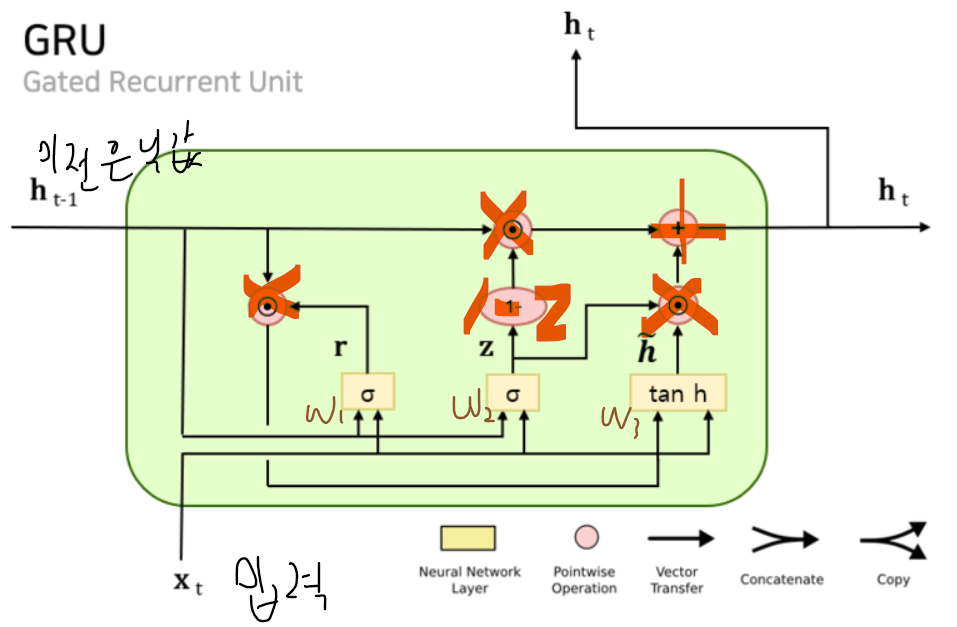
- LSTM의 간소화 버전: 셀상태를 계산하지 않고 셀의 개수는 3

## 1-GRU신경망 생성
- GRU층 사용

In [31]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

### GRU신경망 파라미터개수: (입력층 특성수16 X 뉴런8)+순환가중치(8X8)+절편8=200
### 여기서 셀이3개이므로 200X3=600->추가로 각 셀마다 하나 절편 추가로 필요->3개셀X8개뉴런
### 최종: 600+24=624

## 2-환경설정과 학습

In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(x_train, y_train, epochs=100, batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5178 - loss: 0.6928 - val_accuracy: 0.5290 - val_loss: 0.6920
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5485 - loss: 0.6914 - val_accuracy: 0.5372 - val_loss: 0.6904
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5567 - loss: 0.6895 - val_accuracy: 0.5556 - val_loss: 0.6880
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5790 - loss: 0.6868 - val_accuracy: 0.5660 - val_loss: 0.6849
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5820 - loss: 0.6828 - val_accuracy: 0.5768 - val_loss: 0.6804
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5965 - loss: 0.6774 - val_accuracy: 0.5830 - val_loss: 0.6749
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6085 - loss: 0.6711 - val_accuracy: 0.5974 - val_loss: 0.6671
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6208 - loss: 0.6608 - 

## 3-검증

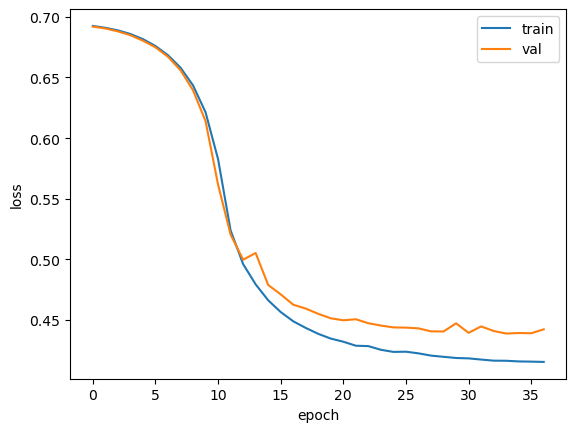

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### LSTM과 비슷한 성능

# 4. 최종 검증과 예측

### 가장 성능좋은 2순환층 모델 가져오기(원래는 이게 제일 성능 좋음)

In [34]:
# 쓰지 않았던 x_test로 테스트
data = pad_sequences(x_test, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

## 검증

In [35]:
rnn_model.evaluate(data, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7820 - loss: 0.4659


[0.46534714102745056, 0.7829599976539612]

## 예측

In [36]:
rnn_model.predict(data) #시그모이드 값 -> 1에가까울수록 긍정, 0에가까울수록 부정

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


array([[0.22806457],
       [0.6354407 ],
       [0.39353028],
       ...,
       [0.12575339],
       [0.15794763],
       [0.74892473]], dtype=float32)

# 5. 트랜스포머
- 챗GPT와 같이 질문과 같은 입력값을 받으면 정답을 출력값으로 내뱉는 구조
- 질문의 encoding, 정답의 decoding 이라는 두 파트로 나뉘어져 있음
- https://www.youtube.com/watch?v=p216tTVxues&list=LL&index=2&t=219s